In [100]:
# Import all the required libraries
import fastf1
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import GradientBoostingRegressor, StackingRegressor
from sklearn.linear_model import Ridge, Lasso
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [102]:
import fastf1
import numpy
import pandas
import matplotlib
import seaborn
import xgboost
import sklearn
import streamlit

print("fastf1:", fastf1.__version__)
print("numpy:", numpy.__version__)
print("pandas:", pandas.__version__)
print("matplotlib:", matplotlib.__version__)
print("seaborn:", seaborn.__version__)
print("xgboost:", xgboost.__version__)
print("scikit-learn:", sklearn.__version__)
print("streamlit:", streamlit.__version__)

fastf1: 3.5.3
numpy: 1.26.4
pandas: 2.2.3
matplotlib: 3.10.0
seaborn: 0.13.2
xgboost: 3.0.0
scikit-learn: 1.6.1
streamlit: 1.37.1


In [104]:
final_df = pd.read_csv('model/DATA/f1_final_data.csv')
final_df

,Round,Abbreviation,GridPosition,Position,Points,DriverName,TeamId,AvgQualiPosition,AvgRacePosition,QualifyingScore
0,1,VER,1.0,1.0,429,Max Verstappen,red_bull,3.538462,3.576923,2.269231
1,1,SAI,4.0,3.0,263,Carlos Sainz,williams,6.240000,6.360000,5.120000
2,1,LEC,2.0,4.0,331,Charles Leclerc,ferrari,5.500000,5.192308,3.750000
3,1,RUS,3.0,5.0,256,George Russell,mercedes,5.423077,6.461538,4.211538
4,1,NOR,7.0,6.0,387,Lando Norris,mclaren,3.269231,4.076923,5.134615
...,...,...,...,...,...,...,...,...,...,...
379,2,TSU,9.0,16.0,29,Yuki Tsunoda,rb,10.769231,13.230769,9.884615
380,2,ALO,13.0,17.0,70,Fernando Alonso,aston_martin,9.653846,10.692308,11.326923
381,2,LEC,6.0,18.0,331,Charles Leclerc,ferrari,5.500000,5.192308,5.750000
382,2,HAM,5.0,19.0,208,Lewis Hamilton,ferrari,8.653846,7.538462,6.826923


In [106]:
# Select only numerical columns from final_df for visualization or modeling
df_plot = final_df.select_dtypes(include='number')

<Axes: >

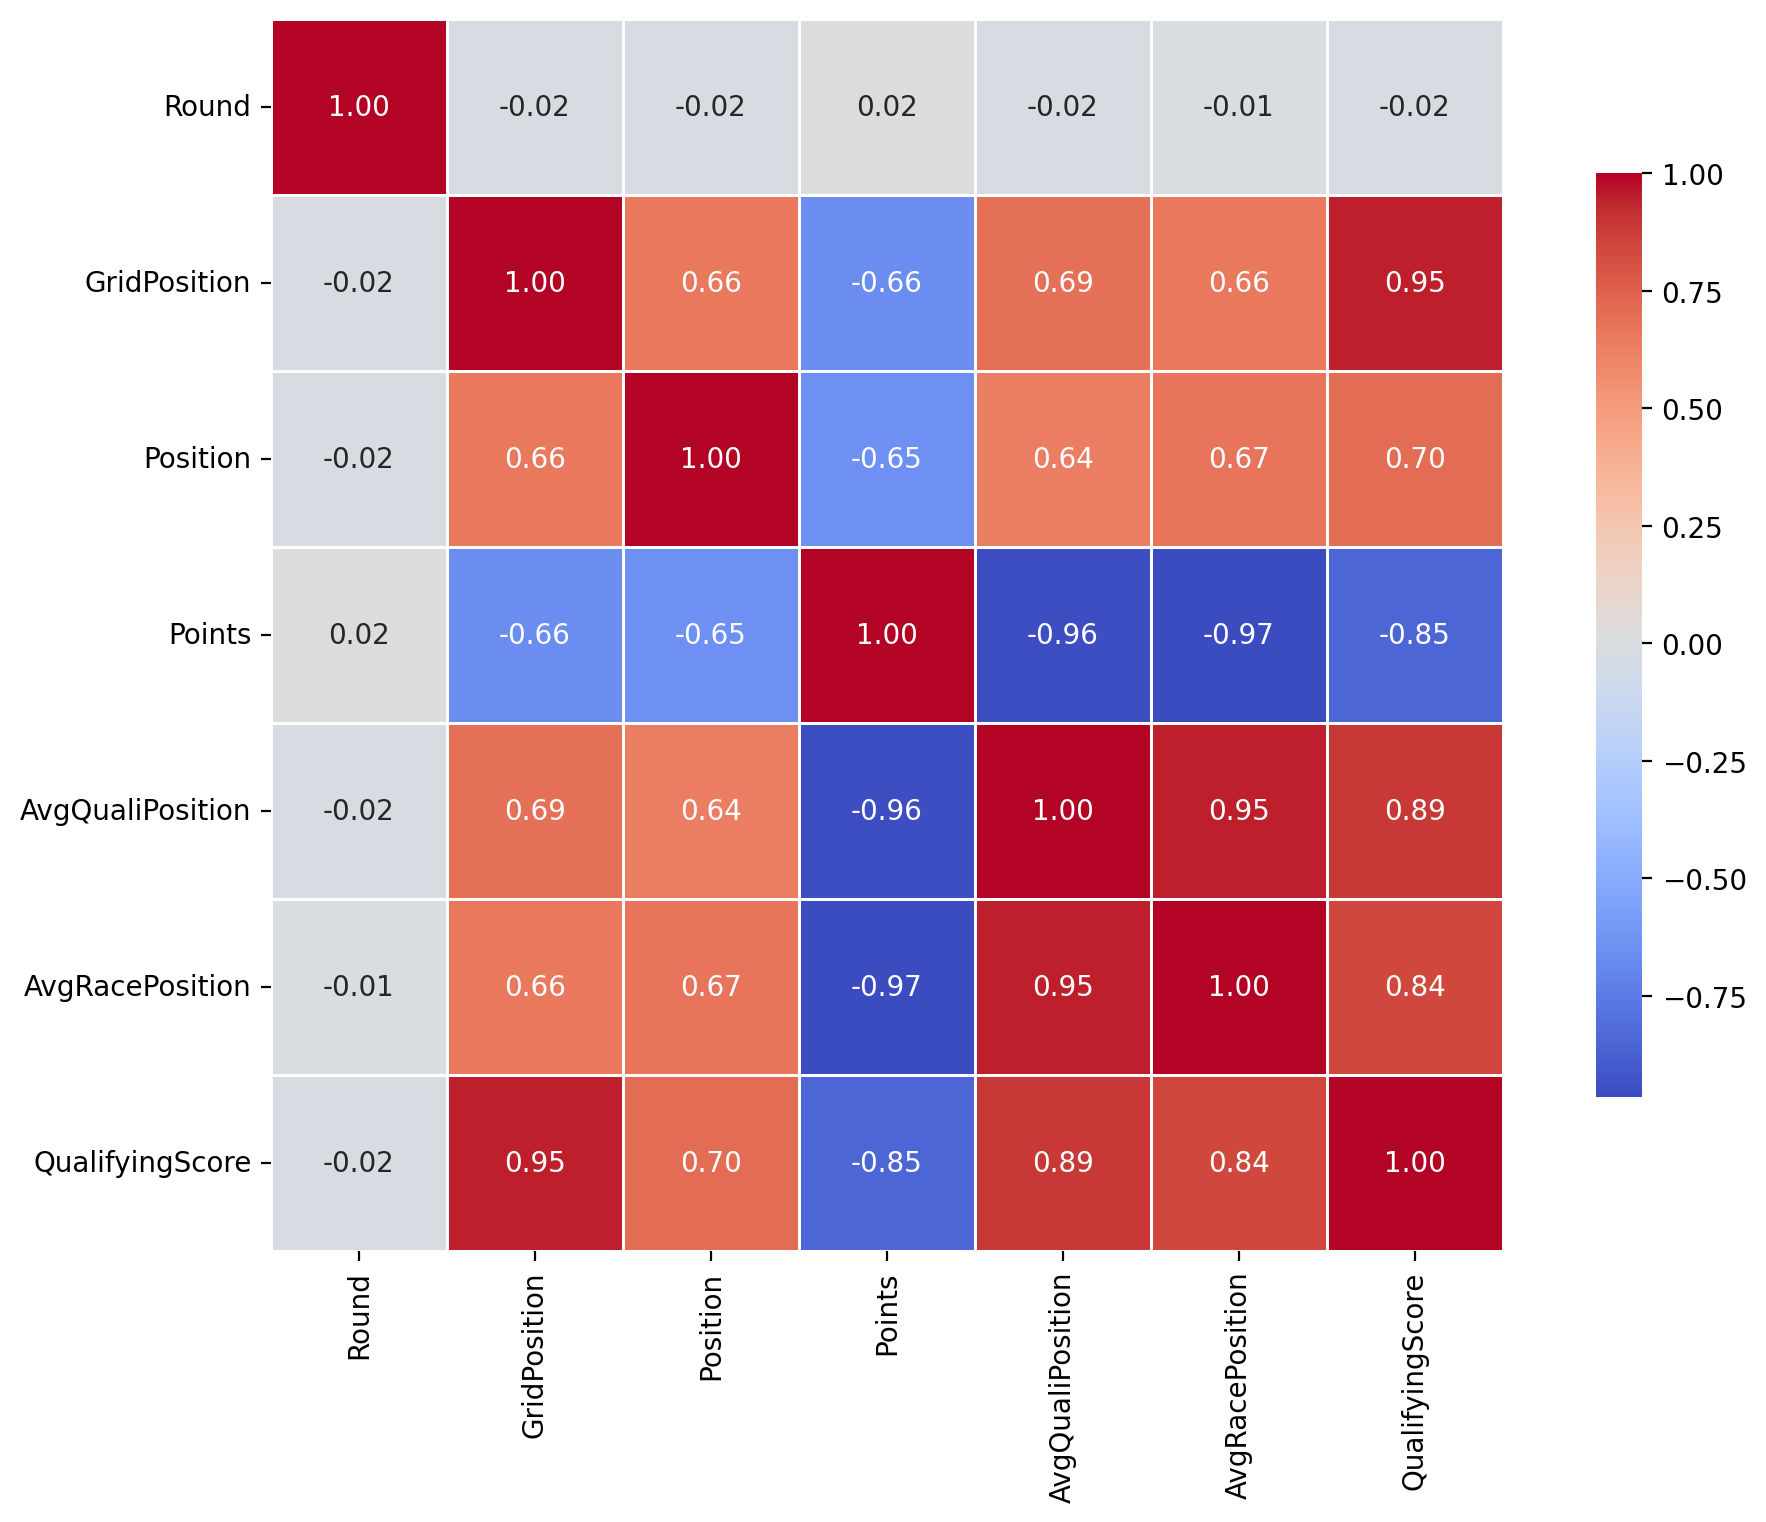

In [108]:
# Set figure size for better visibility
plt.figure(figsize=(12, 8), dpi=200)

# Create a heatmap to visualize correlations between numerical features
sns.heatmap(df_plot.corr(), annot=True, cmap="coolwarm", fmt=".2f", 
            linewidths=1, square=True, cbar_kws={"shrink": 0.75})

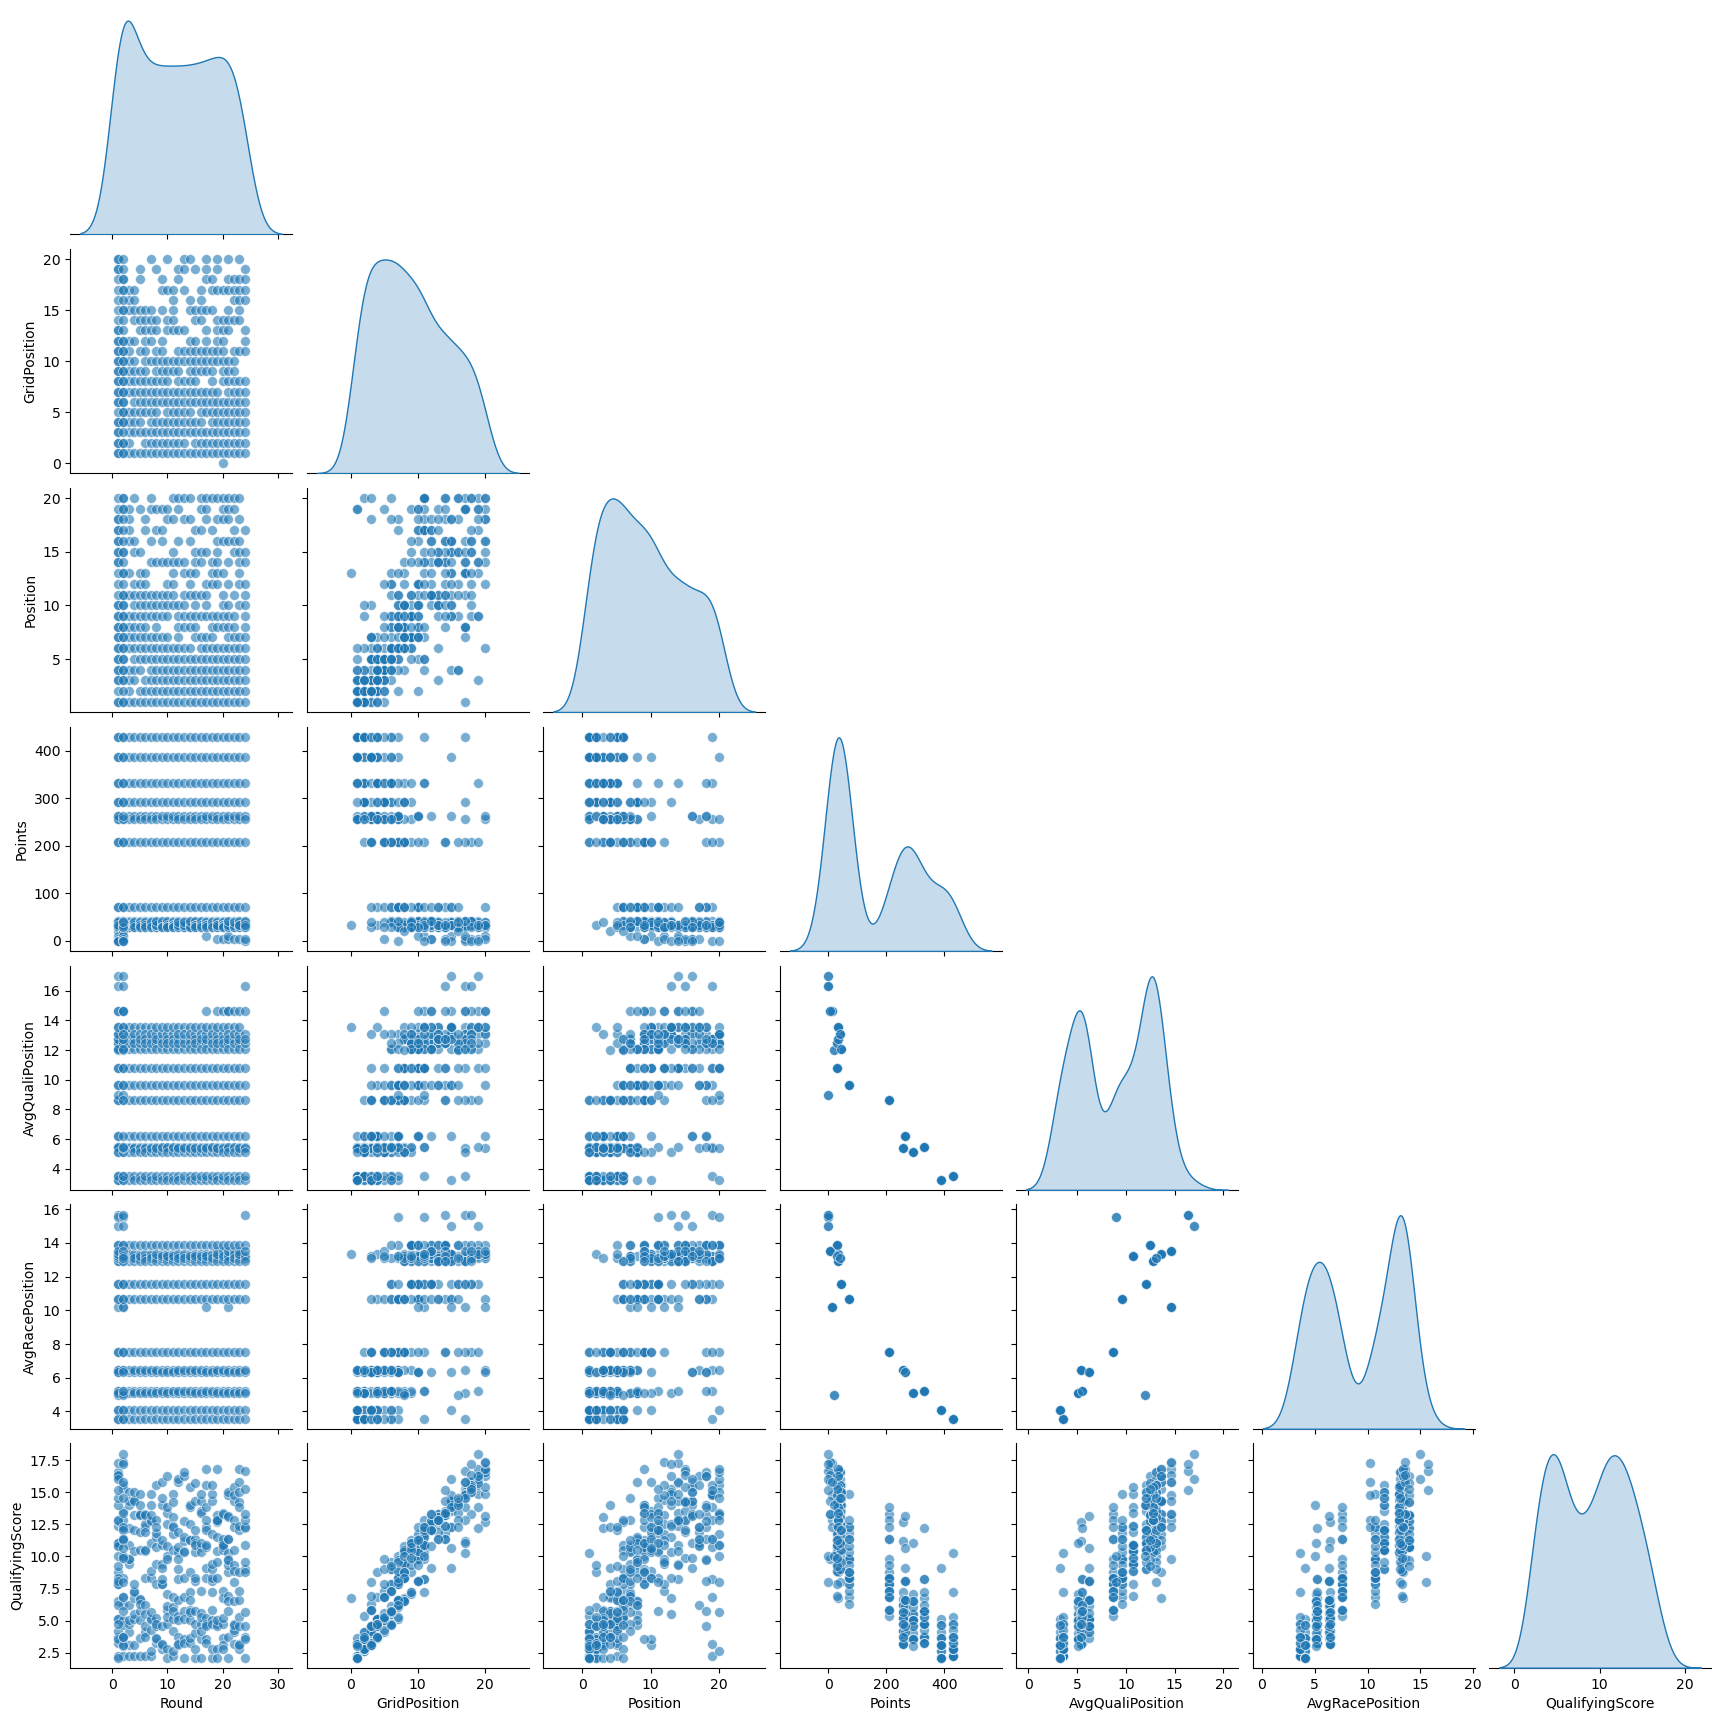

In [109]:
# Generate a pairplot to explore relationships between numerical variables
# - 'diag_kind="kde"' creates kernel density estimates on the diagonal
# - 'corner=True' avoids duplicate plots
# - 'plot_kws' adjusts the appearance of scatter plots
sns.pairplot(df_plot, diag_kind="kde", corner=True, plot_kws={'alpha': 0.6, 's': 50})
plt.show()

In [111]:
final_df = final_df.drop(['DriverName','TeamId'] ,axis=1)
final_df

,Round,Abbreviation,GridPosition,Position,Points,AvgQualiPosition,AvgRacePosition,QualifyingScore
0,1,VER,1.0,1.0,429,3.538462,3.576923,2.269231
1,1,SAI,4.0,3.0,263,6.240000,6.360000,5.120000
2,1,LEC,2.0,4.0,331,5.500000,5.192308,3.750000
3,1,RUS,3.0,5.0,256,5.423077,6.461538,4.211538
4,1,NOR,7.0,6.0,387,3.269231,4.076923,5.134615
...,...,...,...,...,...,...,...,...
379,2,TSU,9.0,16.0,29,10.769231,13.230769,9.884615
380,2,ALO,13.0,17.0,70,9.653846,10.692308,11.326923
381,2,LEC,6.0,18.0,331,5.500000,5.192308,5.750000
382,2,HAM,5.0,19.0,208,8.653846,7.538462,6.826923


In [112]:
# Create new column for tier label
def position_tier(pos):
    if pos <= 5:
        return 0  # Top Tier
    elif pos <= 10:
        return 1  # Midfield
    else:
        return 2  # Backmarker

In [113]:
# Apply to target column
final_df["PositionTier"] = final_df["Position"].apply(position_tier)

In [114]:
final_df

,Round,Abbreviation,GridPosition,Position,Points,AvgQualiPosition,AvgRacePosition,QualifyingScore,PositionTier
0,1,VER,1.0,1.0,429,3.538462,3.576923,2.269231,0
1,1,SAI,4.0,3.0,263,6.240000,6.360000,5.120000,0
2,1,LEC,2.0,4.0,331,5.500000,5.192308,3.750000,0
3,1,RUS,3.0,5.0,256,5.423077,6.461538,4.211538,0
4,1,NOR,7.0,6.0,387,3.269231,4.076923,5.134615,1
...,...,...,...,...,...,...,...,...,...
379,2,TSU,9.0,16.0,29,10.769231,13.230769,9.884615,2
380,2,ALO,13.0,17.0,70,9.653846,10.692308,11.326923,2
381,2,LEC,6.0,18.0,331,5.500000,5.192308,5.750000,2
382,2,HAM,5.0,19.0,208,8.653846,7.538462,6.826923,2


In [115]:
# Replace these with your actual feature columns
X = final_df.drop(columns=['Position', 'PositionTier']) 
y = final_df['PositionTier']

label_enc_driver = LabelEncoder()
X["Abbreviation"] = label_enc_driver.fit_transform(X["Abbreviation"])

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [117]:
X_train

,Round,Abbreviation,GridPosition,Points,AvgQualiPosition,AvgRacePosition,QualifyingScore
165,12,13,18.0,33,13.560000,13.320000,15.780000
322,23,8,6.0,208,8.653846,7.538462,7.326923
220,16,6,14.0,40,13.076923,13.076923,13.538462
94,7,13,12.0,33,13.560000,13.320000,12.780000
232,17,3,10.0,11,14.600000,10.200000,12.300000
...,...,...,...,...,...,...,...
71,6,19,1.0,429,3.538462,3.576923,2.269231
106,8,0,9.0,28,12.500000,13.884615,10.750000
270,20,11,4.0,331,5.500000,5.192308,4.750000
348,1,0,6.0,28,12.500000,13.884615,9.250000


In [126]:
feature_columns = X_train.columns.tolist()
joblib.dump(feature_columns, "model/feature_columns.pkl")

['model/feature_columns.pkl']

In [127]:
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Save it
joblib.dump(scaler, "model/scaler.pkl")

['model/scaler.pkl']

In [130]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [132]:
gbr = GradientBoostingRegressor(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 7],
    'min_samples_leaf': [1, 3, 5]
}

grid = GridSearchCV(gbr, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid.fit(X_scaled, y)

best_gbr = grid.best_estimator_

In [133]:
# Define base estimators
estimators = [
    ('ridge', Ridge(alpha=1.0)),
    ('lasso', Lasso(alpha=0.01)),
    ('xgb', XGBRegressor(n_estimators=200, verbosity=0)),
    ('gbr', best_gbr)  # use the best tuned GBR
]

# Define stacking regressor
stack = StackingRegressor(estimators=estimators, final_estimator=Ridge())

# Split again for stacking
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Fit and evaluate
stack.fit(X_train, y_train)
y_pred = stack.predict(X_test)

In [134]:
print(f"Stacking R2 Score: {r2_score(y_test, y_pred):.4f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")

Stacking R2 Score: 0.6603
MAE: 0.41
RMSE: 0.51


In [135]:
import joblib
joblib.dump(stack, "model/f1_race_predictor_model.pkl")

['model/f1_race_predictor_model.pkl']